# Let's now evaluate all of our models on test data

## First, we import everything


In [1]:
import tensorflow as tf, argparse
from Nets.Training import *
from Core.LoadTrainingData import *
from Core.Misc import kbToPx , normalize_local
import pandas as pd


## We now define the necessary paths to all files: experimentally acquiered optical maps and the models folder. For example, let's test whether we can distinguish E.coli from S.enterica.

In [2]:
data_to_analyse = 'Data\measured\EColi\segmentation-results.hdf5'
cnn_folder      = 'Models\EColiTest'
output_path     = 'Data\output'


## Loading all the data and applying local normalization and rescaling...


In [3]:

data_loader = ExperimentalData()
x_data = []

for data in data_loader.load_experimental_data(data_to_analyse):
	pixel_local_window = kbToPx(10000,[1.72,0.34,78.6])
	data = normalize_local(pixel_local_window, data)
	x_data.append(data*100)

	

## Now that we have our data loaded, we can evaluate the models on it and store the raw score result in out.csv in the output_path. The species profile is automatically thresholded and is stored in results.csv

In [32]:
genomes,results = eval_models(cnn_folder,output_path,x_data,0.12)

## We can plot these results in a histogram. Consider Escherichia coli in this case as the true positive genome

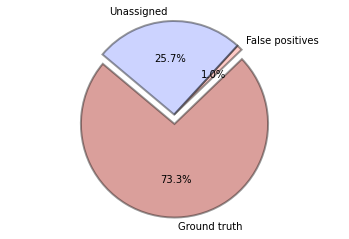

In [34]:
import matplotlib.pyplot as plt  
import numpy as np 


tp_genome = 'E.Coli'


unassigned_traces = np.sum(~results.any(1))/results.shape[0]
trace_matches = dict(zip(genomes,[results[:,x] for x in range(0,results.shape[1])]))


tp_matches = np.sum(trace_matches[tp_genome])/results.shape[0]
fp_matches = np.sum([np.sum(trace_matches[key]) for key in trace_matches.keys() if key!=tp_genome])/results.shape[0]





labels = [  'Ground truth','False positives','Unassigned']
colors = [[163/255, 17/255, 7/255], [255/255, 126/255, 117/255], [128/255, 147/255, 255/255]]
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie([tp_matches,fp_matches,unassigned_traces], explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140,wedgeprops={'alpha':0.4,"edgecolor":"k",'linewidth': 2})

plt.axis('equal')



## Let's compare with the cross-correlation

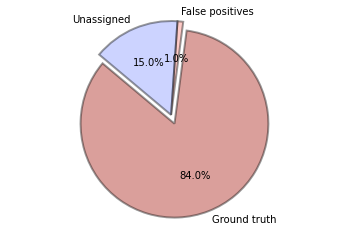

In [30]:
tp_genome = 'E.coli'
genomes = ['E.coli','S.enterica']

xcorr_scores = pd.read_csv('Data/xcorr/xcorr_alignment.csv')
results = np.stack([xcorr_scores['E.coli'],xcorr_scores['S.enterica']],axis=-1)
results = 1-results

results[results<1-0.000365]=0
results[results>1-0.000365]=1



unassigned_traces = np.sum(~results.any(1))/results.shape[0]
trace_matches = dict(zip(genomes,[results[:,x] for x in range(0,results.shape[1])]))


tp_matches = np.sum(trace_matches[tp_genome])/results.shape[0]
fp_matches = np.sum([np.sum(trace_matches[key]) for key in trace_matches.keys() if key!=tp_genome])/results.shape[0]





labels = [  'Ground truth','False positives','Unassigned']
colors = [[163/255, 17/255, 7/255], [255/255, 126/255, 117/255], [128/255, 147/255, 255/255]]
explode = (0.1, 0, 0)  
# Plot
plt.figure()
plt.pie([tp_matches,fp_matches,unassigned_traces], explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140,wedgeprops={'alpha':0.4,"edgecolor":"k",'linewidth': 2})


